In [1]:
#app.py에서 corona 만든거 실행
import requests

In [9]:
url = "http://localhost:3000/corona"
params = {
    'servicekey': 'bbb'
}

requests.get(url, params=params).content

b'servicekey error'

다른 웹페이지 보기

In [18]:
url = "https://www.naver.com"
data = requests.get(url)

In [14]:
# import pprint as pp
# pp.pprint(data.content)

(b'\n<!doctype html>                          <html lang="ko" data-dark="fal'
 b'se"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-'
 b'UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"'
 b'> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robo'
 b'ts" content="index,nofollow"/> <meta name="description" content='
 b'"\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90'
 b'\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4'
 b'\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90'
 b'\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8'
 b'\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4'
 b'\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> '
 b'<meta property="og:image" content="https://s.pstatic.net/static/www/mobile/e'
 b'dit/2016/0705/mobile_212852414260.png"> <meta proper

In [19]:
data = data.text

In [20]:
data.find("네이버")

365

In [21]:
data[365:368]

'네이버'

In [22]:
!pip install bs4

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for bs4: started
  Running setup.py install for bs4: finished with status 'done'


  DEPRECATION: bs4 is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559


# beautifulsoup 라이브러리
1. html tag의 데이터를 쉽게 추출하기 위한 라이브러리
2. 웹의 구조를 어느정도 인지를 한 상태에서 라이브러리 사용하면
쉽게 데이터 추출
3. 파서를 활용하여 파이썬에서 접근이 쉽게 객체 형태로 제공


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
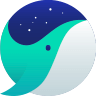
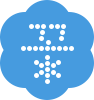

In [23]:
from bs4 import BeautifulSoup as bs
soup = bs(data, 'html.parser')
soup

- 태그의 이름을 사용해서 검색
    - soup[태그명]: 해당 태그의 첫번째 정보를 출력
    - soup[태그명][속성]: 해당 태그의 첫번째 속성에 대한 값을 출력

In [25]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)

<title>NAVER</title>
title
NAVER


In [27]:
print(soup.img)
print(soup.img['alt'])

<img alt="조선비즈" class="news_logo" height="20" src="https://s.pstatic.net/static/newsstand/2020/logo/light/0604/366.png"/>
조선비즈
